## Модель прогнозирования температуры плавления стали

### Описание проекта

Данное исследование предназначено для выявления наиболее подходящей модели машинного обучения, 
которая позволит предсказывать температуру сплава в производственном процессе на металлургическом комбинате "Стальная птица"


### Описание данных

Были предоставлены 7 файлов с табицами данных:  
1. data_arc_new.csv — данные об электродах;   
2. data_bulk_new.csv — данные о подаче сыпучих материалов (объём);    
3. data_bulk_time_new.csv — данные о подаче сыпучих материалов (время);  
4. data_gas_new.csv — данные о продувке сплава газом;  
5. data_temp_new.csv — результаты измерения температуры;  
6. data_wire_new.csv — данные о проволочных материалах (объём);  
7. data_wire_time_new.csv — данные о проволочных материалах (время).  
Все таблицы имеют столбец с ключом, его численнное выражение отражает номер партии.

### План работы  
1 Загрузка данных   
2 Обзор таблицы с данными  
3 Предобработка данных  
4 Объединение данных    
5 Статистический анализ объединенных данных    
6 Подготовка данных к обучению моделей прогнозирования   
7 Обучение моделей машинного обучения     
8 Тестирование лучшей модели  
9 Общий вывод и рекомендации заказчику  

### Загрузка данных

In [1]:
!pip install shap -q
!pip install lightgbm
!pip install catboost
!pip install scikit-learn --upgrade
!pip install phik

     |████████████████████████████████| 12.2 MB 311 kB/s eta 0:00:01
     |████████████████████████████████| 302 kB 183 kB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
     |████████████████████████████████| 686 kB 1.1 MB/s eta 0:00:01


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import phik
import seaborn as sns
import shap
from scipy import stats as st
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.compose import ColumnTransformer
RANDOM_STATE = 180324

from sklearn.feature_selection import RFECV
from scipy.stats import binom
from math import sqrt
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
#np.random.seed(0)




In [3]:
pd.set_option('display.max_columns', 50) 
pth1_1 = '/datasets/data_arc_new.csv'
pth2_1 = 'data_arc_new.csv'

pth1_2 = '/datasets/data_bulk_new.csv'
pth2_2 = 'data_bulk_new.csv'

pth1_3 = '/datasets/data_bulk_time_new.csv'
pth2_3 = 'data_bulk_time_new.csv'

pth1_4 = '/datasets/data_gas_new.csv'
pth2_4 = 'data_gas_new.csv'

pth1_5 = '/datasets/data_temp_new.csv'
pth2_5 = 'data_temp_new.csv'

pth1_6 = '/datasets/data_wire_new.csv'
pth2_6 = 'data_wire_new.csv'

pth1_7 = '/datasets/data_wire_time_new.csv'
pth2_7 = 'data_wire_time_new.csv'

if os.path.exists(pth1_1):
    data_arc_new = pd.read_csv(pth1_1, sep=',', decimal=';')
elif os.path.exists(pth2_1):
    data_arc_new = pd.read_csv(pth2_1, sep=',', decimal=';')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_2):
    data_bulk_new = pd.read_csv(pth1_2, sep=',', decimal=';')
elif os.path.exists(pth2_2):
    data_bulk_new = pd.read_csv(pth2_2, sep=',', decimal=';')
else:
    print('Something is wrong')
    
if os.path.exists(pth1_3):
    data_bulk_time_new = pd.read_csv(pth1_3, sep=',', decimal=';')
elif os.path.exists(pth2_3):
    data_bulk_time_new = pd.read_csv(pth2_3, sep=',', decimal=';')
else:
    print('Something is wrong')   
    
if os.path.exists(pth1_4):
    data_gas_new = pd.read_csv(pth1_4, sep=',', decimal=';')
elif os.path.exists(pth2_4):
    data_gas_new = pd.read_csv(pth2_4, sep=',', decimal=';')
else:
    print('Something is wrong')    

if os.path.exists(pth1_5):
    data_temp_new = pd.read_csv(pth1_5, sep=',', decimal=';')
elif os.path.exists(pth2_5):
    data_temp_new = pd.read_csv(pth2_5, sep=',', decimal=';')
else:
    print('Something is wrong')  

if os.path.exists(pth1_6):
    data_wire_new = pd.read_csv(pth1_6, sep=',', decimal=';')
elif os.path.exists(pth2_6):
    data_wire_new = pd.read_csv(pth2_6, sep=',', decimal=';')
else:
    print('Something is wrong')  
    
if os.path.exists(pth1_7):
    data_wire_time_new = pd.read_csv(pth1_7, sep=',', decimal=';')
elif os.path.exists(pth2_7):
    data_wire_time_new = pd.read_csv(pth2_7, sep=',', decimal=';')
else:
    print('Something is wrong') 

In [4]:
display(data_arc_new.head(5), data_arc_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key                   14876 non-null  int64 
 1   Начало нагрева дугой  14876 non-null  object
 2   Конец нагрева дугой   14876 non-null  object
 3   Активная мощность     14876 non-null  object
 4   Реактивная мощность   14876 non-null  object
dtypes: int64(1), object(4)
memory usage: 581.2+ KB


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.30513,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.43046
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


None

In [5]:
display(data_bulk_new.head(5), data_bulk_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


None

In [6]:
display(data_bulk_time_new.head(5), data_bulk_time_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


None

In [7]:
display(data_gas_new.head(5), data_gas_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3239 non-null   int64 
 1   Газ 1   3239 non-null   object
dtypes: int64(1), object(1)
memory usage: 50.7+ KB


,key,Газ 1
0,1,29.7499859302
1,2,12.5555609779
2,3,28.5547926192
3,4,18.8412192323
4,5,5.4136918254


None

In [8]:
display(data_temp_new.head(5), data_temp_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   key           18092 non-null  int64 
 1   Время замера  18092 non-null  object
 2   Температура   14665 non-null  object
dtypes: int64(1), object(2)
memory usage: 424.2+ KB


,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


None

In [9]:
display(data_wire_new.head(5), data_wire_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

In [10]:
display(data_wire_time_new.head(5), data_wire_time_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

Необходимо произвести замену названий столбцов: привести к нижнему регистру, транскрибировать

In [11]:
def change_name(data, new_names=[], rename=True):
    if rename == False:
        new_names=[]
        for col in data.columns:
            new_names.append(str.lower('_'.join(col.split(' '))))
        data.columns = new_names
    else:
        data.columns = new_names
    return display(data.head(5))

In [12]:
arc_cols = [ 'key','start_heating', 'end_heating', 'active_power', 'reactive_power']
gas_cols = ['key', 'gas']
temp_cols = ['key', 'measure_time', 'temperature']

In [13]:
change_name(data_arc_new, arc_cols, rename=True)
change_name(data_bulk_new, rename=False)
change_name(data_bulk_time_new, rename=False)
change_name(data_gas_new, gas_cols, rename=True)
change_name(data_temp_new, temp_cols, rename=True)
change_name(data_wire_new, rename=False)
change_name(data_wire_time_new, rename=False)

,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.30513,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.43046
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


,key,gas
0,1,29.7499859302
1,2,12.5555609779
2,3,28.5547926192
3,4,18.8412192323
4,5,5.4136918254


,key,measure_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Семь таблиц с инфорацией о производстве стали содержат корректные данные, соответствующие описанию файлов.  
Таблицы содержат показатели, описывающее производство  3239 партий стали.  
Были произведены изменения в названиях столбцов и унификация их написания для удобной работы с данными:   
    приведение к нижнему регистру и перевод на английский


### Обзор таблиц с данными

#### Данные об электродах data_arc_new

In [14]:
data_arc_new['active_power'] = data_arc_new['active_power'].astype(float)
data_arc_new['reactive_power'] = data_arc_new['reactive_power'].astype(float)
data_arc_new['start_heating'] = data_arc_new['start_heating'].astype("datetime64[ns]")
data_arc_new['end_heating'] = data_arc_new['end_heating'].astype("datetime64[ns]")

In [15]:
display(data_arc_new.head(5), data_arc_new.describe(), data_arc_new.info())
print(f'Пропуски: {data_arc_new.isna().sum()}')
print(f'Дубликаты: {data_arc_new.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14876 non-null  int64         
 1   start_heating   14876 non-null  datetime64[ns]
 2   end_heating     14876 non-null  datetime64[ns]
 3   active_power    14876 non-null  float64       
 4   reactive_power  14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB


,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


,key,active_power,reactive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


None

Пропуски: key               0
start_heating     0
end_heating       0
active_power      0
reactive_power    0
dtype: int64
Дубликаты: 0


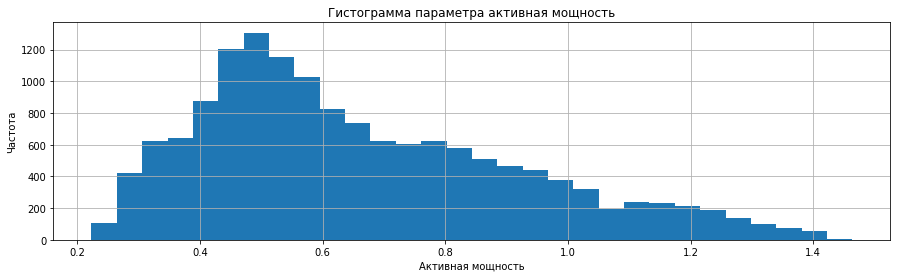

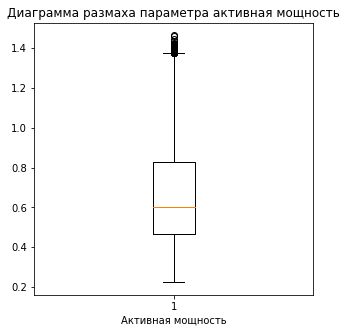

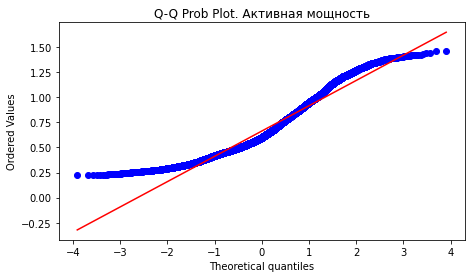

In [16]:
plt.figure(figsize=(15,4))
plt.hist(data_arc_new['active_power'], histtype='bar', bins=30)
plt.title('Гистограмма параметра активная мощность' )
plt.xlabel('Активная мощность')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,5))
plt.boxplot(data_arc_new['active_power'])
plt.xlabel('Активная мощность')
plt.title('Диаграмма размаха параметра активная мощность' )
plt.show()

plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
st.probplot(data_arc_new['active_power'], dist="norm", plot=plt)
plt.title("Q-Q Prob Plot. " + 'Активная мощность' )
plt.show()

Распределение параметра "активная мощность" близко к нормальному, но с заметным хвостом в правую сторону.  
Смещённость графика также отражает разница между средним (0.66) и медианным (0.60) значениями.  
По графику "ящик с усами" видно, что в этом хвосте, скорее, выборсы.  


In [17]:
#удаление аномального отрицательного значения
data_arc_new = data_arc_new.query('reactive_power > 0')

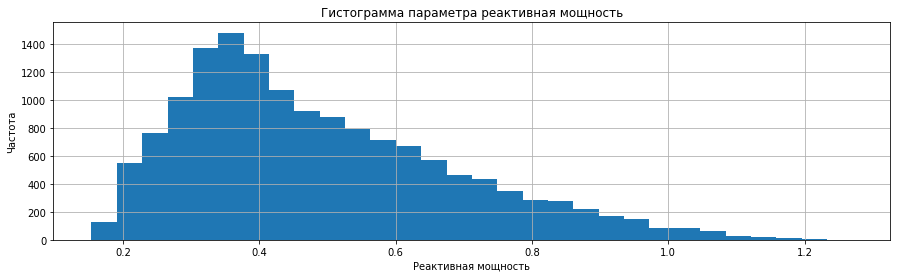

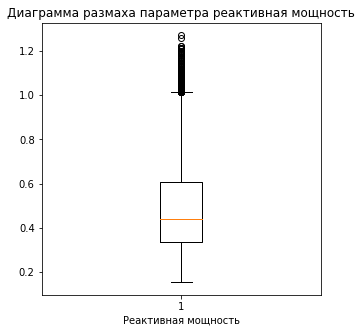

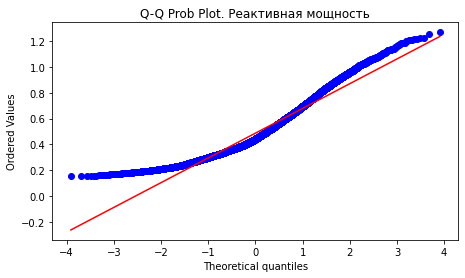

In [18]:

plt.figure(figsize=(15,4))
plt.hist(data_arc_new['reactive_power'], histtype='bar', bins=30)
plt.title('Гистограмма параметра реактивная мощность' )
plt.xlabel('Реактивная мощность')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,5))
plt.boxplot(data_arc_new['reactive_power'])
plt.xlabel('Реактивная мощность')
plt.title('Диаграмма размаха параметра реактивная мощность' )
plt.show()

plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
st.probplot(data_arc_new['reactive_power'], dist="norm", plot=plt)
plt.title("Q-Q Prob Plot. " + 'Реактивная мощность' )
plt.show()

Распределение параметра "реактивная мощность" близко к нормальному, но с хвостом в большую сторону.  
Тем не менее разница между средним (0.439) и медианным (0.442) значениями минимальна, разброс данных меньше чем у предыдущего параметра.  

По графику "ящик с усами" видно, что значения в правом хвосте являются скорее выбросами

#### Данные о подаче сыпучих материалов (объём) data_bulk_new

In [19]:
data_bulk_new = data_bulk_new.astype(float)
data_bulk_new['key'] = data_bulk_new['key'].astype(int)


In [20]:
display(data_bulk_new.head(5), data_bulk_new.describe(), data_bulk_new.info())
print(f'Пропуски: {data_bulk_new.isna().sum()}')
print(f'Дубликаты: {data_bulk_new.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


None

Пропуски: key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64
Дубликаты: 0


1. Большое количество пропусков связанно с тем, что они отсутствуют в добавках. Можно заменить на ноль  
2. Необходимо заменить тип данных  
3. Количество ключей (3128) не совпадает с предыдущей таблицей (3241). Возможно к некоторым этапам не добовляли сыпучие материалы.  

In [21]:
data_bulk_new=data_bulk_new.fillna(0)
display(data_bulk_new.head(5), data_bulk_new.describe(), data_bulk_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   3129 non-null   float64
 2   bulk_2   3129 non-null   float64
 3   bulk_3   3129 non-null   float64
 4   bulk_4   3129 non-null   float64
 5   bulk_5   3129 non-null   float64
 6   bulk_6   3129 non-null   float64
 7   bulk_7   3129 non-null   float64
 8   bulk_8   3129 non-null   float64
 9   bulk_9   3129 non-null   float64
 10  bulk_10  3129 non-null   float64
 11  bulk_11  3129 non-null   float64
 12  bulk_12  3129 non-null   float64
 13  bulk_13  3129 non-null   float64
 14  bulk_14  3129 non-null   float64
 15  bulk_15  3129 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0
1,2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0
2,3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0
3,4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0
4,5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000,3129.000000
mean,1624.383509,3.160435,1.779163,47.240332,33.830617,2.633749,21.892298,2.441675,0.015660,0.463407,4.684564,4.345478,203.948226,1.041866,152.706616,115.319271
std,933.337642,11.869164,21.217878,74.239954,56.034505,20.918138,55.492582,31.944063,0.875978,6.154398,20.157323,22.699580,151.419639,14.114252,81.091421,84.488698
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,816.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,104.000000,0.000000
50%,1622.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,148.000000,106.000000
75%,2431.000000,0.000000,0.000000,80.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,263.000000,0.000000,202.000000,204.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.000000,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


None

#### Данные о подаче сыпучих материалов (время) data_bulk_time_new

In [22]:

date_cols = ['bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 
             'bulk_7','bulk_8','bulk_9','bulk_10','bulk_11','bulk_12','bulk_13','bulk_14','bulk_15']
data_bulk_time_new[date_cols] = data_bulk_time_new[date_cols].astype("datetime64[ns]")

In [23]:
display(data_bulk_time_new.head(5), data_bulk_time_new.describe(), data_bulk_time_new.info())
print(f'Пропуски: {data_bulk_time_new.isna().sum()}')
print(f'Дубликаты: {data_bulk_time_new.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   bulk_1   252 non-null    datetime64[ns]
 2   bulk_2   22 non-null     datetime64[ns]
 3   bulk_3   1298 non-null   datetime64[ns]
 4   bulk_4   1014 non-null   datetime64[ns]
 5   bulk_5   77 non-null     datetime64[ns]
 6   bulk_6   576 non-null    datetime64[ns]
 7   bulk_7   25 non-null     datetime64[ns]
 8   bulk_8   1 non-null      datetime64[ns]
 9   bulk_9   19 non-null     datetime64[ns]
 10  bulk_10  176 non-null    datetime64[ns]
 11  bulk_11  177 non-null    datetime64[ns]
 12  bulk_12  2450 non-null   datetime64[ns]
 13  bulk_13  18 non-null     datetime64[ns]
 14  bulk_14  2806 non-null   datetime64[ns]
 15  bulk_15  2248 non-null   datetime64[ns]
dtypes: datetime64[ns](15), int64(1)
memory usage: 391.2 KB


,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47


,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


None

Пропуски: key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64
Дубликаты: 0


1. Большое количество пропусков - можно заполнить нулями  
2. Нужно изменить тип данных 

#### Данные о продувке сплава газом data_gas_new

In [24]:
data_gas_new['gas'] = data_gas_new['gas'].astype(float)

In [25]:
display(data_gas_new.head(5), data_gas_new.describe(), data_gas_new.info())
print(f'Пропуски: {data_gas_new.isna().sum()}')
print(f'Дубликаты: {data_gas_new.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas     3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


,key,gas
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


,key,gas
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


None

Пропуски: key    0
gas    0
dtype: int64
Дубликаты: 0


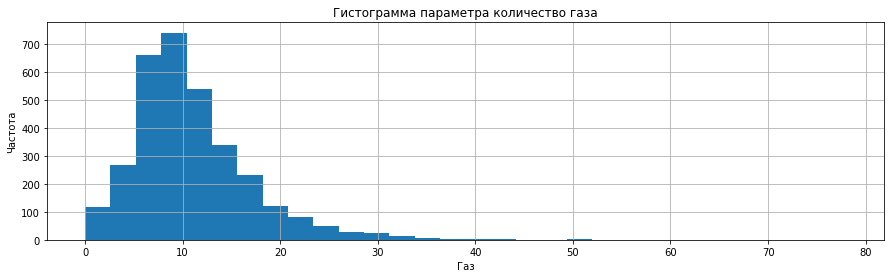

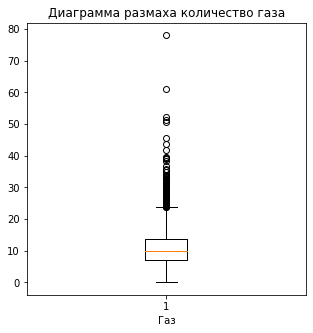

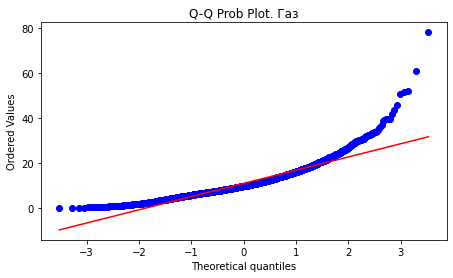

In [26]:
plt.figure(figsize=(15,4))
plt.hist(data_gas_new['gas'], histtype='bar', bins=30)
plt.title('Гистограмма параметра количество газа' )
plt.xlabel('Газ')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,5))
plt.boxplot(data_gas_new['gas'])
plt.xlabel('Газ')
plt.title('Диаграмма размаха количество газа' )
plt.show()

plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
st.probplot(data_gas_new['gas'], dist="norm", plot=plt)
plt.title("Q-Q Prob Plot. " + 'Газ' )
plt.show()

Пропусков и дубликатов не обнаружено.  
Заметны серьёзные аномалии в большую сторону.  
Это видно и по разнице между средним (11) и медианным (9.8) значениям.
Распределение значений тем не менее близко к нормальному.  


#### Результаты измерения температуры data_temp_new

In [27]:
data_temp_new['measure_time'] = pd.to_datetime(data_temp_new['measure_time'])
data_temp_new['temperature'] = data_temp_new['temperature'].astype(float)

In [28]:
display(data_temp_new.head(5), data_temp_new.describe(), data_temp_new.info())
print(f'Пропуски: {data_temp_new.isna().sum()}')
print(f'Дубликаты: {data_temp_new.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   measure_time  18092 non-null  datetime64[ns]
 2   temperature   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB


,key,measure_time,temperature
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0


,key,temperature
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


None

Пропуски: key                0
measure_time       0
temperature     3427
dtype: int64
Дубликаты: 0


Отсутствующие данные по целевому признаку необходимо удалить.

In [29]:
data_temp_new = data_temp_new.dropna()
data_temp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14665 entries, 0 to 18086
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           14665 non-null  int64         
 1   measure_time  14665 non-null  datetime64[ns]
 2   temperature   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 458.3 KB


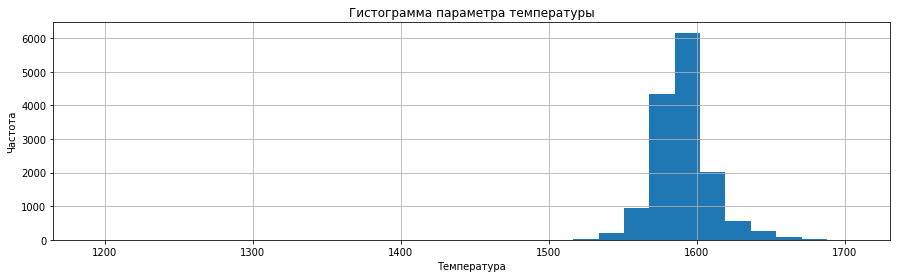

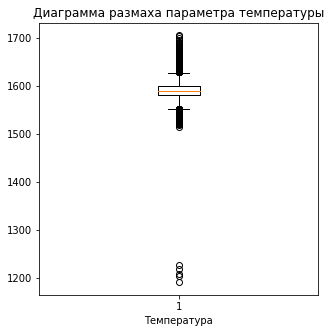

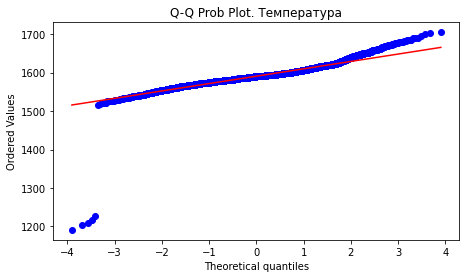

In [30]:
plt.figure(figsize=(15,4))
plt.hist(data_temp_new['temperature'], histtype='bar', bins=30)
plt.title('Гистограмма параметра температуры' )
plt.xlabel('Температура')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

plt.figure(figsize=(5,5))
plt.boxplot(data_temp_new['temperature'].dropna(axis=0))
plt.xlabel('Температура')
plt.title('Диаграмма размаха параметра температуры' )
plt.show()

plt.figure(figsize=(16,4))
ax1 = plt.subplot(121)
st.probplot(data_temp_new['temperature'].dropna(axis=0), dist="norm", plot=plt)
plt.title("Q-Q Prob Plot. " + 'Температура' )
plt.show()

Пропусков в замерах температуры 3427.  
Распределение данных близко к нормальному.  
На графике заметны аномалии и выбросы.  
Тем не менее разница между средним (1590.7) и медианным (1590) значениями минимальна.  
Так как мы знаем, что температура плавления стали примерно равна 1400 градусам,   
то всё, что ниже этого значения, можем считать аномалиями - при такой низкой температуре продукция не получилась бы вовсе.  

Узнаем количество времени между первым и последним замерами температуры для каждой партии.

In [31]:
data_temp_time = data_temp_new.copy()
data_temp_time['measure_time'] = (pd.to_datetime(data_temp_time['measure_time']) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 
data_temp_time = data_temp_time.groupby('key', as_index=False).agg(first_measure_time = ('measure_time', 'first'),
                                                               last_measure_time = ('measure_time', 'last'))
data_temp_time['time_diff'] = data_temp_time['last_measure_time'] - data_temp_time['first_measure_time']
display(data_temp_time.head(5))
display(data_temp_time['time_diff'].describe())

,key,first_measure_time,last_measure_time,time_diff
0,1,1556881324,1556883038,1714
1,2,1556883244,1556884509,1265
2,3,1556885204,1556886957,1753
3,4,1556887167,1556888387,1220
4,5,1556889063,1556890599,1536


count     3216.000000
mean      1755.354167
std       1541.081369
min          0.000000
25%        804.750000
50%       1706.500000
75%       2459.750000
max      23674.000000
Name: time_diff, dtype: float64

Видно, что есть записи, в которых был либо один замер, либо разница во времени слишком велика.  
Данные полученные подобными измерениями можно считать некорректно полученными, а значения - выбросами.  

#### Данные о проволочных материалах (объём) data_wire_new

In [32]:
date_cols = ['wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9']
data_wire_new[date_cols] = data_wire_new[date_cols].astype("float")

In [33]:
display(data_wire_new.head(5), data_wire_new.describe(), data_wire_new.info())
print(f'Пропуски: {data_wire_new.isna().sum()}')
print(f'Дубликаты: {data_wire_new.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


None

Пропуски: key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64
Дубликаты: 0


1. Отсутствие информации означает об отсутствии добавления проволочных материалов в состав сплавов. Можно заменить на нули.   
2. Замена типов данных

In [34]:
data_wire_new=data_wire_new.fillna(0)
display(data_wire_new.head(5), data_wire_new.describe(), data_wire_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3081 non-null   float64
 2   wire_2  3081 non-null   float64
 3   wire_3  3081 non-null   float64
 4   wire_4  3081 non-null   float64
 5   wire_5  3081 non-null   float64
 6   wire_6  3081 non-null   float64
 7   wire_7  3081 non-null   float64
 8   wire_8  3081 non-null   float64
 9   wire_9  3081 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000,3081.000000
mean,1623.426485,100.044411,17.712733,3.874524,0.261019,0.004911,1.137695,0.035842,0.330697,0.321492
std,932.996726,42.841120,33.517734,30.310417,4.293865,0.272615,8.958111,0.774190,4.392677,3.806904
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,823.000000,70.281120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1619.000000,100.114563,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2434.000000,125.798405,23.162880,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132000,180.454575,32.847674,102.762401,90.053604


None

#### Данные о проволочных материалах (время) data_wire_time_new

In [35]:
date_cols = ['wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9']
data_wire_time_new[date_cols] = data_wire_time_new[date_cols].astype("datetime64[ns]")

In [36]:
display(data_wire_time_new.head(5), data_wire_time_new.describe(), data_wire_time_new.info())
print(f'Пропуски: {data_wire_time_new.isna().sum()}')
print(f'Дубликаты: {data_wire_time_new.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   wire_1  3055 non-null   datetime64[ns]
 2   wire_2  1079 non-null   datetime64[ns]
 3   wire_3  63 non-null     datetime64[ns]
 4   wire_4  14 non-null     datetime64[ns]
 5   wire_5  1 non-null      datetime64[ns]
 6   wire_6  73 non-null     datetime64[ns]
 7   wire_7  11 non-null     datetime64[ns]
 8   wire_8  19 non-null     datetime64[ns]
 9   wire_9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB


,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


,key
count,3081.000000
mean,1623.426485
std,932.996726
min,1.000000
25%,823.000000
50%,1619.000000
75%,2434.000000
max,3241.000000


None

Пропуски: key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64
Дубликаты: 0


1. Отсутствие данных заполним нулями  
2. Замента типов данных  

На данном этапе был проведён обзор данных и совершены следующией действия:        
    1) Пропуски в численных параметрах были заполнены нулями      
    2) Были заменены типы данных из object на соответствующие фактическим: float и datetime64   
    3) Были замечены аномалии и выбросы, которые в необходимо обработать на будущих этапах
    

### Предобработка данных

Целевой признак: температура сплава.     
Для корректной работы модели на этапе тренировки необходимо передать адекватные данные.    
Для оценки качества данных будем придерживаться следующих критериев:    
    1) Больше одного измерения температуры на партию    
    2) В рассчёт не берём температуру ниже температуры плавления стали    
    3) Последний контрольный замер температуры - завершающий этап производства  

In [37]:
data_temp_new['measure_time'] = pd.to_datetime(data_temp_new['measure_time'])
print('Количество партий до обработки:', data_temp_new['key'].nunique())

Количество партий до обработки: 3216


Исключим из рассмотрения строки с отсутствующими показаниями температуры.    
Также необходимо сравнить время замера температуры.

In [38]:
final_mesure = data_temp_new.loc[~data_temp_new['temperature'].isna()].groupby('key', as_index=False).agg(
                                                                last_measure = ('measure_time', 'last'),
                                                                last_temp = ('temperature', 'last'),
                                                                count_measures = ('temperature', 'count'))
final_mesure = final_mesure.loc[final_mesure['count_measures'] > 1]
display(final_mesure.head())
print('Количество пропущеных значений last_temp:', final_mesure['last_temp'].isna().sum())
print('Всего значений в таблице:', len(final_mesure))

,key,last_measure,last_temp,count_measures
0,1,2019-05-03 11:30:38,1613.0,6
1,2,2019-05-03 11:55:09,1602.0,5
2,3,2019-05-03 12:35:57,1599.0,6
3,4,2019-05-03 12:59:47,1625.0,5
4,5,2019-05-03 13:36:39,1602.0,5


Количество пропущеных значений last_temp: 0
Всего значений в таблице: 2475


Данные с замерами больше одного собраны в таблицу с 2475 записями.     
Сопоставим время замера температуры сплава.  
Время последнего замера конца нагревания обязательно должно быть последним.  

In [39]:
data_arc = data_arc_new.groupby('key', as_index=False).agg(last_start_heating_arc = ('start_heating', 'last'),
                                                            last_end_heating_arc = ('end_heating', 'last'))
data_arc['time_diff'] = (data_arc['last_end_heating_arc'] - data_arc['last_start_heating_arc']) // pd.Timedelta('1s')
display(data_arc.head(),data_arc.describe() )


,key,last_start_heating_arc,last_end_heating_arc,time_diff
0,1,2019-05-03 11:26:09,2019-05-03 11:28:37,148
1,2,2019-05-03 11:49:48,2019-05-03 11:53:18,210
2,3,2019-05-03 12:31:14,2019-05-03 12:32:19,65
3,4,2019-05-03 12:53:12,2019-05-03 12:57:50,278
4,5,2019-05-03 13:32:44,2019-05-03 13:33:55,71


,key,time_diff
count,3214.000000,3214.000000
mean,1623.061294,119.712197
std,934.739859,65.958160
min,1.000000,11.000000
25%,817.250000,72.000000
50%,1623.500000,103.000000
75%,2431.750000,150.000000
max,3241.000000,599.000000


Видим, что в таблице время последнего замера нагрева всегда на последнем месте, нет отрицательных значений.  
  Данные можно доверять.

Объединим таблицы

In [40]:
joined_time_measure = final_mesure.merge(data_arc, right_on='key', left_on='key')
display(joined_time_measure.head())
print('Количество уникальных партий до сравнения:', joined_time_measure['key'].nunique())

,key,last_measure,last_temp,count_measures,last_start_heating_arc,last_end_heating_arc,time_diff
0,1,2019-05-03 11:30:38,1613.0,6,2019-05-03 11:26:09,2019-05-03 11:28:37,148
1,2,2019-05-03 11:55:09,1602.0,5,2019-05-03 11:49:48,2019-05-03 11:53:18,210
2,3,2019-05-03 12:35:57,1599.0,6,2019-05-03 12:31:14,2019-05-03 12:32:19,65
3,4,2019-05-03 12:59:47,1625.0,5,2019-05-03 12:53:12,2019-05-03 12:57:50,278
4,5,2019-05-03 13:36:39,1602.0,5,2019-05-03 13:32:44,2019-05-03 13:33:55,71


Количество уникальных партий до сравнения: 2475


In [41]:
display(joined_time_measure.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))

,key,last_temp,count_measures,time_diff
count,2475.000000,2475.000000,2475.000000,2475.000000
mean,1250.787071,1595.336162,5.625859,120.481212
std,719.787271,16.023153,1.610087,66.405505
min,1.000000,1541.000000,2.000000,11.000000
5%,126.700000,1576.000000,3.000000,47.000000
25%,629.500000,1587.000000,5.000000,72.000000
50%,1252.000000,1593.000000,5.000000,104.000000
75%,1872.500000,1599.000000,7.000000,150.000000
95%,2371.300000,1621.000000,8.000000,249.000000
99%,2473.260000,1661.260000,10.000000,329.780000


In [42]:
#display(len(joined_time_measure.query('time_diff > 329')))

Видим, что есть 25 записей, когда промежуток времени между замерами не попадает в 99% данных.  
Эти записи можем исключить из рассмотрения.  

In [43]:
#joined_time_measure = joined_time_measure.query('time_diff < 330')

Отберём подходящие ключи для настройки работы модели.    
Время замера температуры стали должно быть последним. 
Составим список подходящих ключей.

In [44]:
keys = joined_time_measure.loc[(joined_time_measure['last_measure'] > joined_time_measure['last_start_heating_arc']) |
                     (joined_time_measure['last_measure'] > joined_time_measure['last_end_heating_arc'])]['key'].values
display(keys)

array([   1,    2,    3, ..., 2497, 2498, 2499])

In [45]:
final_temp_data = final_mesure.loc[data_arc['key'].isin(keys)]
display(final_temp_data.head())
print('Доля оставшихся записей:', final_temp_data['key'].nunique() / data_temp_new['key'].nunique())
print('Количество уникальных партий стали:', final_temp_data['key'].nunique())

,key,last_measure,last_temp,count_measures
0,1,2019-05-03 11:30:38,1613.0,6
1,2,2019-05-03 11:55:09,1602.0,5
2,3,2019-05-03 12:35:57,1599.0,6
3,4,2019-05-03 12:59:47,1625.0,5
4,5,2019-05-03 13:36:39,1602.0,5


Доля оставшихся записей: 0.7689676616915423
Количество уникальных партий стали: 2473


Осталось 77% отобранных данных. 
Количество уникальных партий стали: 2473
Добавим начальную температуру в качестве признака, а количество измерений уберём:

In [46]:
final_temp_data1 = final_temp_data.drop(['last_measure', 'count_measures'], axis=1)
final_temp_data2 = final_temp_data1.join(data_temp_new.groupby('key', as_index=False).agg(
                                                                    start_temp=('temperature', 'first'))['start_temp'],
                                                                    how='left', rsuffix='_r')
display(final_temp_data2)

,key,last_temp,start_temp
0,1,1613.0,1571.0
1,2,1602.0,1581.0
2,3,1599.0,1596.0
3,4,1625.0,1601.0
4,5,1602.0,1576.0
...,...,...,...
2470,2493,1594.0,1599.0
2471,2494,1591.0,1585.0
2472,2495,1591.0,1570.0
2473,2496,1591.0,1554.0


In [47]:
display(final_temp_data2.head(), final_temp_data2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2474
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   key         2473 non-null   int64  
 1   last_temp   2473 non-null   float64
 2   start_temp  2473 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 141.8 KB


,key,last_temp,start_temp
0,1,1613.0,1571.0
1,2,1602.0,1581.0
2,3,1599.0,1596.0
3,4,1625.0,1601.0
4,5,1602.0,1576.0


None

In [48]:
keys = final_temp_data2['key']
display(len(keys))

2473

На данном этапе были произведены следующие действия:  
    1) Из данных были исключены записи, содержащие меньше двух замеров температуры нагрева    
    2) Убедились в корретности регистрации нагревания по времени - последний замер всегда идёт после первого замера.  
    3) Сопоставили время контрольного замера температуры со временем начала и конца нагрева  
    4) Собрали список ключей партий, прошедших по критериям отбора.  
    5) Из первоначальных 3216 партий к дальнейшему рассмотрению оставляем 2473 партий. Количество партий сократилось на 23%

### Объединение таблиц  

In [49]:
data_arc_new.head()

,key,start_heating,end_heating,active_power,reactive_power
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [50]:
data_arc_new = data_arc_new.query('reactive_power > 0')
display(data_arc_new.corr())

,key,active_power,reactive_power
key,1.000000,-0.010226,-0.013169
active_power,-0.010226,1.000000,0.966373
reactive_power,-0.013169,0.966373,1.000000


Так как активная и реактивные мощности сильно коррелируют, создадим признак, который их объединит - возьмем соотношение мощностей

In [51]:
data_arc_new['power_ratio'] = data_arc_new['active_power'] / data_arc_new['reactive_power']
display(data_arc_new)
data_arc_new.corr()

,key,start_heating,end_heating,active_power,reactive_power,power_ratio
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,1.444382
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,1.603680
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,1.348123
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,1.364539
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.347126
...,...,...,...,...,...,...
14871,3241,2019-09-06 16:49:05,2019-09-06 16:51:42,0.439735,0.299579,1.467843
14872,3241,2019-09-06 16:55:11,2019-09-06 16:58:11,0.646498,0.458240,1.410828
14873,3241,2019-09-06 17:06:48,2019-09-06 17:09:52,1.039726,0.769302,1.351519
14874,3241,2019-09-06 17:21:58,2019-09-06 17:22:55,0.530267,0.361543,1.466678


,key,active_power,reactive_power,power_ratio
key,1.000000,-0.010226,-0.013169,0.015062
active_power,-0.010226,1.000000,0.966373,-0.007238
reactive_power,-0.013169,0.966373,1.000000,-0.243677
power_ratio,0.015062,-0.007238,-0.243677,1.000000


Сгрупперуем данные по ключу и найдём средние и суммарные величины параметров

In [52]:
arc_grouped = data_arc_new.groupby('key', as_index=False).agg(start_active = ('active_power', 'mean'),
                                                               start_reactive = ('reactive_power', 'mean'),
                                                               power_ratio = ('power_ratio', 'mean'),
                                                               active_mean = ('active_power', 'mean'),
                                                                reactive_mean = ('reactive_power', 'mean'))

In [53]:
display(arc_grouped.head())

,key,start_active,start_reactive,power_ratio,active_mean,reactive_mean
0,1,0.607346,0.428564,1.421570,0.607346,0.428564
1,2,0.534852,0.363339,1.479201,0.534852,0.363339
2,3,0.812728,0.587491,1.396069,0.812728,0.587491
3,4,0.676622,0.514248,1.307446,0.676622,0.514248
4,5,0.563238,0.421998,1.328894,0.563238,0.421998


In [54]:
arc_grouped.corr()

,key,start_active,start_reactive,power_ratio,active_mean,reactive_mean
key,1.000000,-0.023743,-0.030265,0.030531,-0.023743,-0.030265
start_active,-0.023743,1.000000,0.965377,0.013934,1.000000,0.965377
start_reactive,-0.030265,0.965377,1.000000,-0.227186,0.965377,1.000000
power_ratio,0.030531,0.013934,-0.227186,1.000000,0.013934,-0.227186
active_mean,-0.023743,1.000000,0.965377,0.013934,1.000000,0.965377
reactive_mean,-0.030265,0.965377,1.000000,-0.227186,0.965377,1.000000


Есть сильная коррекляция между активной и реактивной мощностями. Оставим только среднюю

In [55]:
arc_grouped = arc_grouped.drop(['start_active', 'start_reactive'], axis=1)
display(arc_grouped.head())

,key,power_ratio,active_mean,reactive_mean
0,1,1.421570,0.607346,0.428564
1,2,1.479201,0.534852,0.363339
2,3,1.396069,0.812728,0.587491
3,4,1.307446,0.676622,0.514248
4,5,1.328894,0.563238,0.421998


Сведём все признаки в единую таблицу

In [56]:

data = arc_grouped.merge(data_bulk_new, on='key', how='inner')
data = data.merge(data_gas_new, on='key', how='inner')
data = data.merge(final_temp_data2, on='key', how='inner')
data = data.merge(data_wire_new, on='key', how='inner')



In [57]:
display(data.head(), len(data))

,key,power_ratio,active_mean,reactive_mean,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas,last_temp,start_temp,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,1.421570,0.607346,0.428564,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986,1613.0,1571.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.479201,0.534852,0.363339,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561,1602.0,1581.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.396069,0.812728,0.587491,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793,1599.0,1596.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.307446,0.676622,0.514248,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219,1625.0,1601.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.328894,0.563238,0.421998,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692,1602.0,1576.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


2327

In [58]:
data = data.loc[data['key'].isin(keys)]

In [59]:
display(data.head())
print('Размер таблицы:', data.shape)
print('Количество пропусков:', data.isna().sum())

,key,power_ratio,active_mean,reactive_mean,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas,last_temp,start_temp,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,1.421570,0.607346,0.428564,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,29.749986,1613.0,1571.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1.479201,0.534852,0.363339,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,12.555561,1602.0,1581.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1.396069,0.812728,0.587491,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,28.554793,1599.0,1596.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.307446,0.676622,0.514248,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,18.841219,1625.0,1601.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1.328894,0.563238,0.421998,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,5.413692,1602.0,1576.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Размер таблицы: (2327, 31)
Количество пропусков: key              0
power_ratio      0
active_mean      0
reactive_mean    0
bulk_1           0
bulk_2           0
bulk_3           0
bulk_4           0
bulk_5           0
bulk_6           0
bulk_7           0
bulk_8           0
bulk_9           0
bulk_10          0
bulk_11          0
bulk_12          0
bulk_13          0
bulk_14          0
bulk_15          0
gas              0
last_temp        0
start_temp       0
wire_1           0
wire_2           0
wire_3           0
wire_4           0
wire_5           0
wire_6           0
wire_7           0
wire_8           0
wire_9           0
dtype: int64


Пропуски заполним нулями

In [60]:
data = data.fillna(0)
print('Максимальное количество пропусков:', data.isna().sum().max())

Максимальное количество пропусков: 0


Было произведено объединение таблиц, содержащих данные об электродах, объемах подачи сыпучих веществ, продувке сплава газом, 
проволочных материалах и замерах температуры.  
Данные были отобраны по ключам, выявлены на предыдущем этапе работы.  
Был создан дополнительный признак - соотношения активной и реактивной мощностей, также вычислили среднее показателей мощностей.  
Пропуски в данных были заполнены нулями.  
Записи с отсутствующими показателями целевого признака - температуры сплава - в итоговую таблицу не попали.  
Итоговая таблица содержит 2327 записей о партиях стали, что на 28% меньше первоначального количества партий.  



### Статистический анализ объединенных данных

In [61]:
display(data.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))

,key,power_ratio,active_mean,reactive_mean,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas,last_temp,start_temp,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.00000,2327.000000,2327.000000,2327.000000,2327.000000,2327.000000,2327.0,2327.000000,2327.000000,2327.000000,2327.000000
mean,1250.761066,1.371419,0.664204,0.488985,3.430597,1.423722,47.330039,37.335625,2.642458,22.449506,2.006446,0.021057,0.445208,5.013752,4.248818,208.406102,1.068328,153.876235,119.869360,11.374079,1593.36098,1586.724538,102.433552,17.603505,3.237696,0.306813,0.0,0.979661,0.006366,0.311579,0.317385
std,714.133789,0.066011,0.128316,0.097925,12.417060,19.090275,75.337608,58.658238,22.411789,55.810975,30.689363,1.015776,6.223301,20.831713,22.524821,157.128947,14.241139,81.435663,84.628444,6.394358,11.20394,28.300428,43.557202,33.630535,27.954720,4.759782,0.0,8.696988,0.205793,4.404590,3.458034
min,1.000000,1.099589,0.267676,0.196228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008399,1541.00000,1191.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
5%,135.300000,1.259426,0.471075,0.338706,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.603336,1576.00000,1549.000000,30.139199,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,629.500000,1.329056,0.576264,0.420111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,105.000000,0.000000,7.282120,1587.00000,1571.000000,73.201438,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1254.000000,1.372044,0.656027,0.484693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.000000,107.000000,10.100423,1593.00000,1587.000000,101.087998,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1866.500000,1.414695,0.741717,0.546588,0.000000,0.000000,80.000000,77.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.500000,0.000000,204.000000,204.000000,14.215675,1598.00000,1603.000000,128.102516,23.102560,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
95%,2361.700000,1.478793,0.895656,0.661007,29.000000,0.000000,208.400000,156.000000,0.000000,153.000000,0.000000,0.000000,0.000000,54.000000,18.000000,463.700000,0.000000,295.700000,216.000000,23.240763,1617.00000,1628.000000,176.114946,90.222501,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
99%,2472.740000,1.524109,0.994198,0.749326,54.000000,0.000000,304.740000,221.000000,102.740000,261.740000,0.000000,0.000000,0.000000,106.000000,135.220000,567.000000,0.000000,354.000000,230.740000,32.648591,1622.00000,1644.740000,217.532945,150.217918,196.173270,0.000000,0.0,39.819438,0.000000,0.000000,3.420872


In [63]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   key            2327 non-null   int64  
 1   power_ratio    2327 non-null   float64
 2   active_mean    2327 non-null   float64
 3   reactive_mean  2327 non-null   float64
 4   bulk_1         2327 non-null   float64
 5   bulk_2         2327 non-null   float64
 6   bulk_3         2327 non-null   float64
 7   bulk_4         2327 non-null   float64
 8   bulk_5         2327 non-null   float64
 9   bulk_6         2327 non-null   float64
 10  bulk_7         2327 non-null   float64
 11  bulk_8         2327 non-null   float64
 12  bulk_9         2327 non-null   float64
 13  bulk_10        2327 non-null   float64
 14  bulk_11        2327 non-null   float64
 15  bulk_12        2327 non-null   float64
 16  bulk_13        2327 non-null   float64
 17  bulk_14        2327 non-null   float64
 18  bulk_15 

None

In [64]:
phik_overview = phik_matrix(data) 

interval columns not set, guessing: ['key', 'power_ratio', 'active_mean', 'reactive_mean', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15', 'gas', 'last_temp', 'start_temp', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6', 'wire_7', 'wire_8', 'wire_9']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable wire_5 for analysis 1. Dropping this column
  warnings.warn(


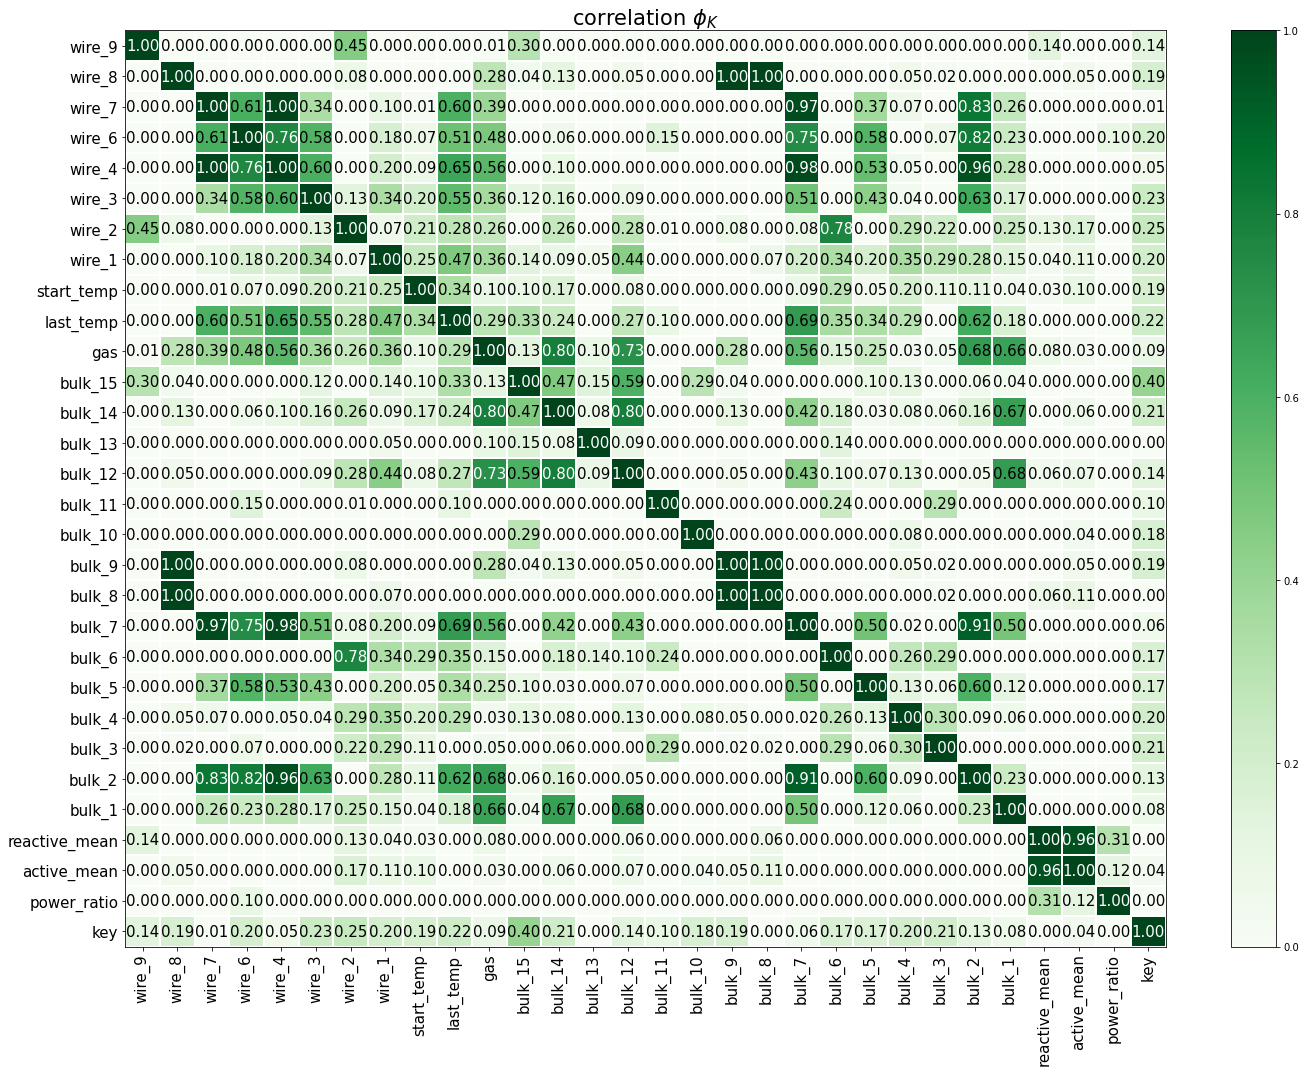

In [65]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Видим, что среди следующих признаков наблюдается сильная коррекляция:    
bulk_8 и bulk_9 с wire_8;   
bulk_7 с wire_7,   
bulk_7 с wire_4,    
wire_4 с wire_7,   
bulk_7 с bulk_2,   
bulk_2 с wire_4,     
reactive_mean с active_mean.    
Сильно коррелирующие признаки нужно удалить:  
bulk_7, wire_4, bulk_2, wire_8, bulk_8, reactive_mean 

In [66]:
data = data.drop(['bulk_7', 'wire_4', 'bulk_2', 'wire_8','bulk_8', 'reactive_mean', 'key'], axis=1)

In [67]:
phik_overview = phik_matrix(data) 

interval columns not set, guessing: ['power_ratio', 'active_mean', 'bulk_1', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12', 'bulk_13', 'bulk_14', 'bulk_15', 'gas', 'last_temp', 'start_temp', 'wire_1', 'wire_2', 'wire_3', 'wire_5', 'wire_6', 'wire_7', 'wire_9']


/opt/conda/lib/python3.9/site-packages/phik/data_quality.py:72: UserWarning: Not enough unique value for variable wire_5 for analysis 1. Dropping this column
  warnings.warn(


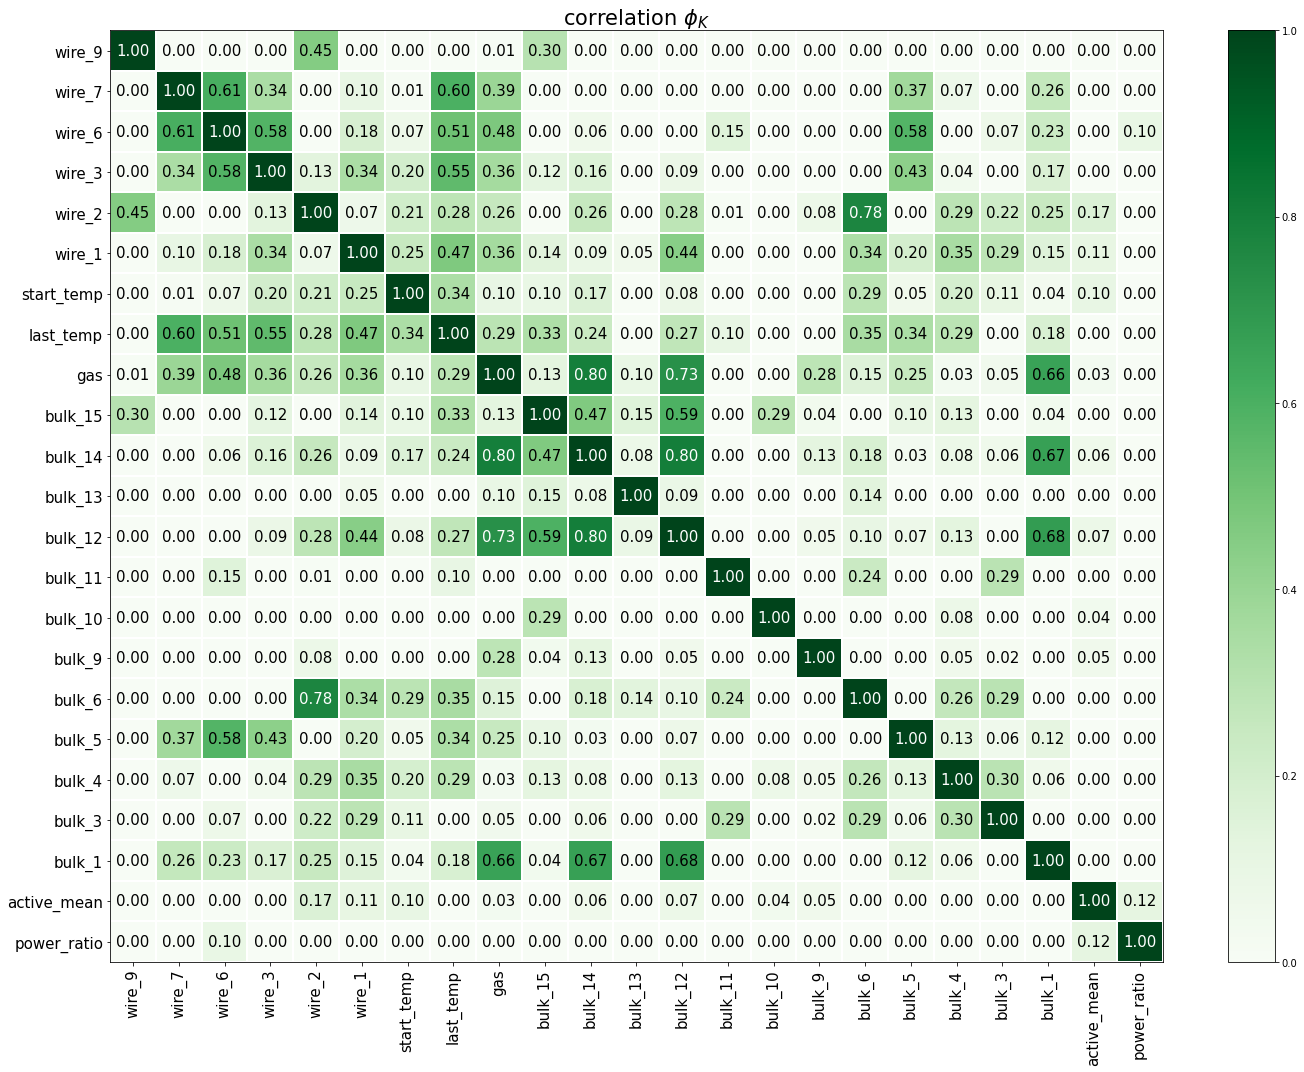

In [68]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

На данном этапе была рассмотрена матрица корреляции всех параметров, содержащихся в объединённой таблице.  
Были замечены параметры, имещие сильню корреляцию между собой(больше 0.90).  
Для избежания мультиколлинеарности, из таблицы были удалены следующие параметры:    
bulk_7, wire_4, bulk_2, wire_8, bulk_8, reactive_mean    
Также при рассмотрении статистики данных, были замечены значения, 
которые можно оценить как выбросы (ниже 5% данных и выше 99% данных) в следующих столбцах:  
    'power_ratio', 'active_mean', 'gas', 'last_temp', 'start_temp'  
Далее необходимо исключить эти значения в тренировочной выборке.  


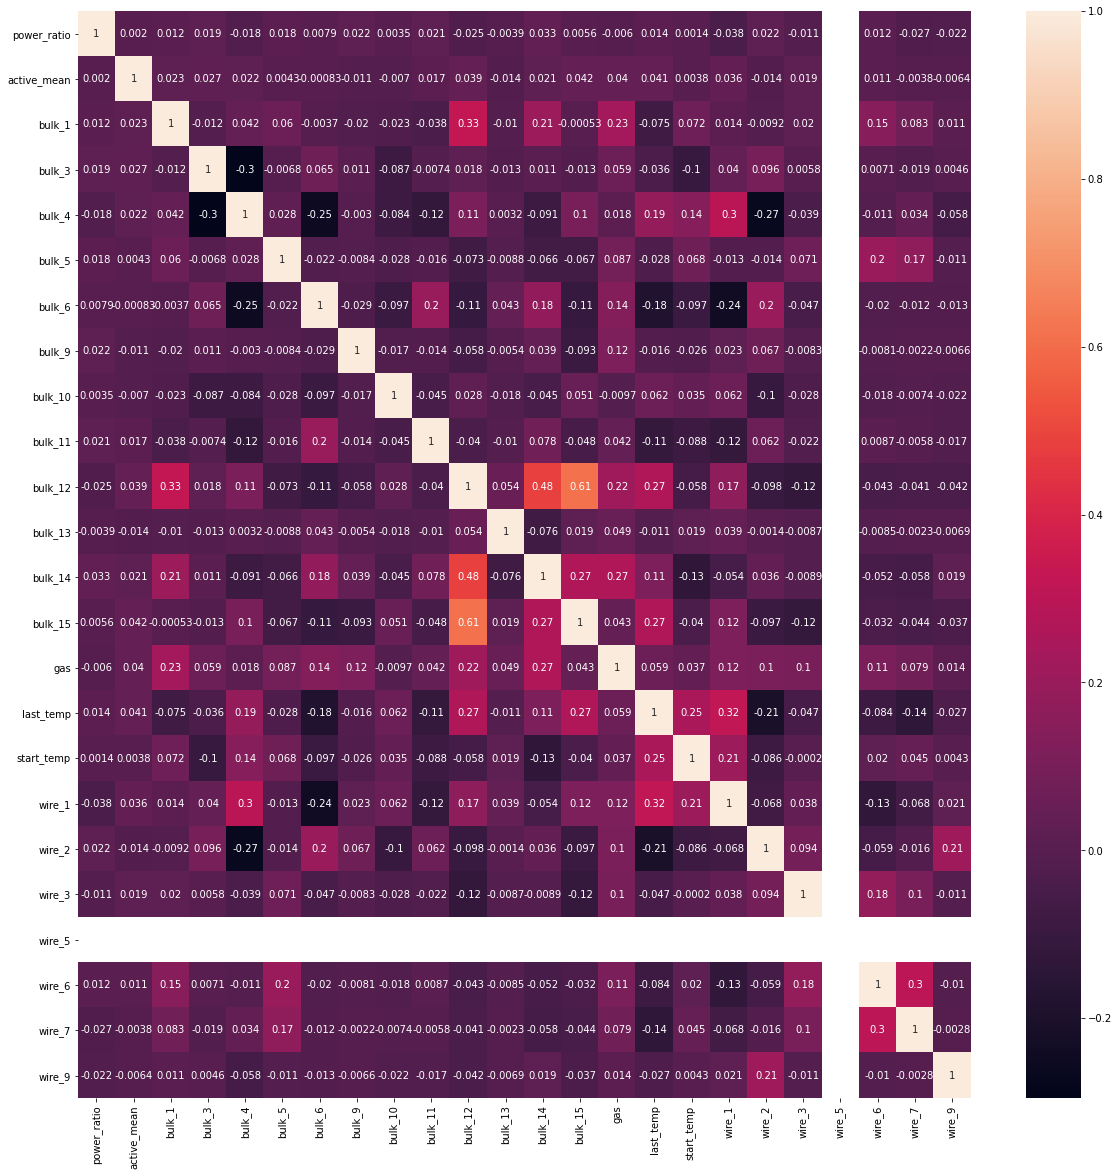

In [69]:
# КОД МЕНТОРА
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Подготовка данных к обучению моделей прогнозирования

In [70]:
train, test = train_test_split(data, test_size=0.25, random_state=180324)

In [71]:
display(train.shape)
display(test.shape)

(1745, 24)

(582, 24)

In [72]:
display(train.head(5), train.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.90, 0.99]))

,power_ratio,active_mean,bulk_1,bulk_3,bulk_4,bulk_5,bulk_6,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas,last_temp,start_temp,wire_1,wire_2,wire_3,wire_5,wire_6,wire_7,wire_9
2259,1.349621,0.642144,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,103.0,0.0,106.0,205.0,9.200765,1581.0,1562.0,45.077759,65.055122,0.000000,0.0,0.0,0.0,0.0
45,1.316406,0.709698,0.0,0.0,0.0,0.0,172.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.120093,1589.0,1573.0,72.203041,47.145283,0.000000,0.0,0.0,0.0,0.0
1230,1.290211,0.835447,0.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.0,206.0,211.0,10.678100,1602.0,1564.0,145.173600,0.000000,0.000000,0.0,0.0,0.0,0.0
1886,1.279025,0.521345,0.0,0.0,121.0,0.0,0.0,0.0,0.0,0.0,411.0,0.0,199.0,208.0,12.351637,1596.0,1548.0,111.209274,13.089440,0.000000,0.0,0.0,0.0,0.0
1717,1.429801,0.538674,0.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.020285,1586.0,1588.0,92.008789,120.097122,282.089813,0.0,0.0,0.0,0.0


,power_ratio,active_mean,bulk_1,bulk_3,bulk_4,bulk_5,bulk_6,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas,last_temp,start_temp,wire_1,wire_2,wire_3,wire_5,wire_6,wire_7,wire_9
count,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.00000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000,1745.0,1745.000000,1745.000000,1745.000000
mean,1.370851,0.663364,3.425788,46.189685,36.475645,2.146132,22.322636,0.482521,4.933524,4.524928,209.515759,1.249284,155.25788,120.397708,11.331806,1593.440115,1586.707163,101.629842,16.979102,3.211149,0.0,0.991720,0.007885,0.333399
std,0.065993,0.129728,12.566809,73.788869,57.887630,17.315968,55.912845,6.670046,20.758361,23.202726,158.456854,15.607914,81.42115,84.148276,6.282141,11.388117,28.433160,43.817354,33.215865,27.618120,0.0,8.456749,0.236303,3.474237
min,1.109868,0.267676,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.008399,1543.000000,1191.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5%,1.259041,0.470707,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.646428,1576.000000,1548.200000,29.249999,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,1.329328,0.574212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,107.00000,0.000000,7.340110,1587.000000,1571.000000,71.111040,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.371168,0.654949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,149.00000,107.000000,10.126385,1593.000000,1586.000000,100.245598,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,1.413622,0.738405,0.000000,79.000000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,290.000000,0.000000,205.00000,204.000000,14.216688,1598.000000,1603.000000,127.342804,20.207199,0.000000,0.0,0.000000,0.000000,0.000000
90%,1.452492,0.834923,0.000000,152.000000,129.000000,0.000000,94.600000,0.000000,0.000000,0.000000,415.000000,0.000000,255.00000,208.000000,18.808789,1609.000000,1619.000000,158.232663,60.169201,0.000000,0.0,0.000000,0.000000,0.000000
99%,1.517591,1.002246,54.000000,302.560000,221.000000,94.960000,261.560000,0.000000,106.000000,139.000000,568.680000,0.000000,353.00000,228.560000,32.235006,1622.000000,1645.000000,213.890970,149.588775,96.586089,0.0,40.070661,0.000000,10.030384


Исключим из тренировочной выборки записи, содержащие аномалии и выбросы вне промежутка от 5% до 90% данных.

In [73]:
cols = ['power_ratio', 'active_mean', 'gas', 'start_temp']
for col in cols:
    Q1 = np.percentile(train[col], 5)
    Q3 = np.percentile(train[col], 90)
    #IQR = Q3 - Q1
    #top_measure = Q3 + 1.5 * IQR
    #bottom_measure = Q1 - 1.5 * IQR
    train=train.loc[train[col] > Q1]
    train=train.loc[train[col] < Q3]

In [74]:
display(train.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95, 0.99]))

,power_ratio,active_mean,bulk_1,bulk_3,bulk_4,bulk_5,bulk_6,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,gas,last_temp,start_temp,wire_1,wire_2,wire_3,wire_5,wire_6,wire_7,wire_9
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.0,899.000000,899.0,899.000000
mean,1.365766,0.647902,2.790879,48.959956,34.711902,1.353726,22.129032,0.272525,5.385984,3.717464,212.547275,1.571746,157.210234,125.741935,10.445154,1593.474972,1583.480534,100.276764,14.866873,3.276510,0.0,0.430966,0.0,0.262574
std,0.046513,0.086268,10.675549,77.690857,57.882113,14.584349,52.379855,4.835171,21.735837,20.385053,144.967890,17.054221,74.275350,81.598903,3.700635,10.328684,16.665062,41.769344,29.190636,29.820077,0.0,4.093430,0.0,3.040498
min,1.259364,0.478710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.740781,1554.000000,1549.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
5%,1.286327,0.504583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.030510,1577.900000,1556.000000,30.008160,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,1.332815,0.585984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,0.000000,112.000000,101.000000,7.580974,1588.000000,1571.000000,70.151638,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,1.368109,0.646870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,0.000000,150.000000,126.000000,9.991967,1593.000000,1583.000000,100.245598,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,1.402095,0.710966,0.000000,78.500000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,289.500000,0.000000,203.000000,204.000000,12.976587,1598.000000,1596.500000,126.104157,19.638320,0.000000,0.0,0.000000,0.0,0.000000
95%,1.438232,0.790701,27.000000,224.000000,155.100000,0.000000,143.100000,0.000000,57.100000,16.000000,461.100000,0.000000,290.200000,211.000000,17.260603,1616.000000,1611.000000,171.170999,80.138134,0.000000,0.0,0.000000,0.0,0.000000
99%,1.450444,0.826077,48.000000,304.020000,221.020000,28.280000,250.040000,0.000000,107.020000,104.060000,521.580000,0.000000,348.000000,228.000000,18.653162,1621.000000,1614.020000,197.833890,133.101505,231.497207,0.0,18.225980,0.0,0.092456


In [75]:
display(train.shape)


(899, 24)

In [76]:
X_train = train.drop(['last_temp'], axis=1)
X_test = test.drop(['last_temp'], axis=1)
y_train = train['last_temp']
y_test = test['last_temp']

In [77]:
col_names = [x for x in X_train.columns]
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[col_names])
X_test_scaled = scaler.transform(X_test[col_names])

X_train = pd.DataFrame(X_train_scaled, columns=col_names)
X_test = pd.DataFrame(X_test_scaled, columns=col_names)

In [78]:
display(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(899, 23)

(582, 23)

(899,)

(582,)

На данном этапе данные были разделены на тренировочную и тестовую выборки в соотношении 3:1.  
В тренировочно выборке были исключены данные, содержащие аномалии и выбросы вне промежутка от 5% до 90% данных.  
Количество строк в тренировочной выборке сократилось с 1745 до 899

### Обучение моделей машинного обучения

#### Константная модель

In [79]:
median = data.last_temp.median()
pred_median = np.ones(data.last_temp.shape) * median
const_mae = mean_absolute_error(pred_median, data.last_temp)
print(f'MAE median: {round(const_mae, 2)}')

MAE median: 8.05


#### LinearRegression

In [80]:
%%time

regressor = LinearRegression()
lr_mae = (cross_val_score(regressor, 
                             X_train, 
                             y_train, 
                             cv=5, 
                             scoring='neg_mean_absolute_error').mean() * -1)
print(lr_mae)

6.994626656829432
CPU times: user 116 ms, sys: 67.9 ms, total: 184 ms
Wall time: 173 ms


#### CatBoostRegressor

In [81]:
%%time

cb = CatBoostRegressor(verbose=False, random_state=RANDOM_STATE)

params_cb = {'n_estimators':[250, 350, 450],
             'learning_rate': [0.01, 0.1],
             'loss_function':['MAE'],
             'max_depth':[4, 5, 7, 10],
             'random_state':[RANDOM_STATE],
             'verbose':[False]}

grid_search2 = GridSearchCV(estimator = cb, 
                           param_grid = params_cb, 
                           cv = 5,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'neg_mean_absolute_error',
                           error_score='raise')
grid_search2.fit(X_train, y_train)

CPU times: user 5min 22s, sys: 3.04 s, total: 5min 25s
Wall time: 6min 50s


GridSearchCV(cv=5, error_score='raise',
             estimator=<catboost.core.CatBoostRegressor object at 0x7f35cfeb5730>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'loss_function': ['MAE'],
                         'max_depth': [4, 5, 7, 10],
                         'n_estimators': [250, 350, 450],
                         'random_state': [180324], 'verbose': [False]},
             scoring='neg_mean_absolute_error')

In [82]:
print(grid_search2.best_params_)

{'learning_rate': 0.1, 'loss_function': 'MAE', 'max_depth': 4, 'n_estimators': 250, 'random_state': 180324, 'verbose': False}


In [83]:
cb_mae = -grid_search2.best_score_
print(cb_mae)

6.785985894420331


#### LightGBM

In [84]:
%%time


param_grid = {'n_estimators':[50, 100, 150],
               'learning_rate':[0.1, 0.01, 0.001],
               'max_depth':[3, 4, 5],
               'num_leaves':range(5,10),
               'random_state':[RANDOM_STATE]}

lgbm = LGBMRegressor(n_jobs = 8)

grid_search3 = GridSearchCV(estimator = lgbm, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'neg_mean_absolute_error',
                           error_score='raise')
grid_search3.fit(X_train, y_train)

CPU times: user 3min 26s, sys: 1.83 s, total: 3min 27s
Wall time: 3min 30s


GridSearchCV(cv=3, error_score='raise', estimator=LGBMRegressor(n_jobs=8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'num_leaves': range(5, 10), 'random_state': [180324]},
             scoring='neg_mean_absolute_error')

In [85]:
print(grid_search3.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'num_leaves': 5, 'random_state': 180324}


In [86]:
lgbm_mae = -grid_search3.best_score_
print(lgbm_mae)

6.868570643308099


#### RandomForestRegressor

In [87]:
rfr = RandomForestRegressor()
parameters = {
    'n_estimators': [200, 350, 500],
    'max_depth': [None],
    'min_samples_split': [2, 3, 4, 5, 7, 10],
    'bootstrap': [True],
    'random_state': [RANDOM_STATE]
}
grid_search4 = GridSearchCV(estimator = rfr, 
                           param_grid = parameters, 
                           cv = 5,
                           n_jobs = -1, 
                           verbose = 0, 
                           scoring = 'neg_mean_absolute_error',
                           error_score='raise')
grid_search4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'min_samples_split': [2, 3, 4, 5, 7, 10],
                         'n_estimators': [200, 350, 500],
                         'random_state': [180324]},
             scoring='neg_mean_absolute_error')

In [88]:
print(grid_search4.best_params_,)

{'bootstrap': True, 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 180324}


In [89]:
rfr_mae = -grid_search4.best_score_
print(rfr_mae)

7.013482681564247


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

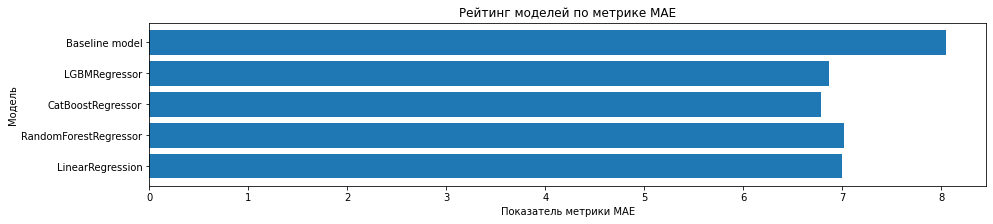

In [90]:
mae = [lr_mae, rfr_mae, cb_mae, lgbm_mae, const_mae]
models = ['LinearRegression', 'RandomForestRegressor', 'CatBoostRegressor', 'LGBMRegressor', 'Baseline model']
scores = []


for metrics in mae:
    scores.append(metrics)
score_data = pd.DataFrame(data={'model':models, 'score':scores})

fig, ax = plt.subplots(figsize=(15, 3))
hbars = ax.barh(score_data['model'], score_data['score'], align='center')
ax.set_ylabel('Модель')
ax.set_xlabel('Показатель метрики MAE')
ax.set_title('Рейтинг моделей п<br>    4. Создании функций для однотипных задач. Часто повторяющийся код можно обернуть в функцию, чтобы визуально было удобно работать с тетрадкой.
  о метрике MAE')

ax.bar_label(hbars, fmt='%.2f', label_type='center')

plt.show()

На данном этапе были обучены четыре модели машинного обучения:    
LinearRegression, RandomForestRegressor, CatBoostRegressor, LGBMRegressor.    
Только модель CatBoostRegressor справились с задачей добиться метрики ниже уровня 6,8.  
На тренировочной выборке лучший показатель продемонстрировала модель CatBoostRegressor со следующими гиперпарамтреами:      
'learning_rate': 0.1, 'loss_function': 'MAE', 'max_depth': 4, 'n_estimators': 250, 'random_state': 180324, 'verbose': False     
Эта модель показала минимальный из четырёх показатель MAE = 6,78.  
Также сопоставляя с MAE константной модели (8.05) видимо, что выявленная лучшая модель справляется с предсказаниями лучше.
Продемонстрируем работу модели на тестовой выборке.  

### Тестирование лучшей модели

In [91]:
model = CatBoostRegressor(
    depth=3,
    loss_function='MAE',
    n_estimators=350,
    random_state=180324,
    verbose = False
)

model.fit(X_train, y_train)
predictions = model.predict(X_test)
result = mean_absolute_error(y_test, predictions)
print(f'MAE (test): {result:.2f}')

MAE (test): 6.55


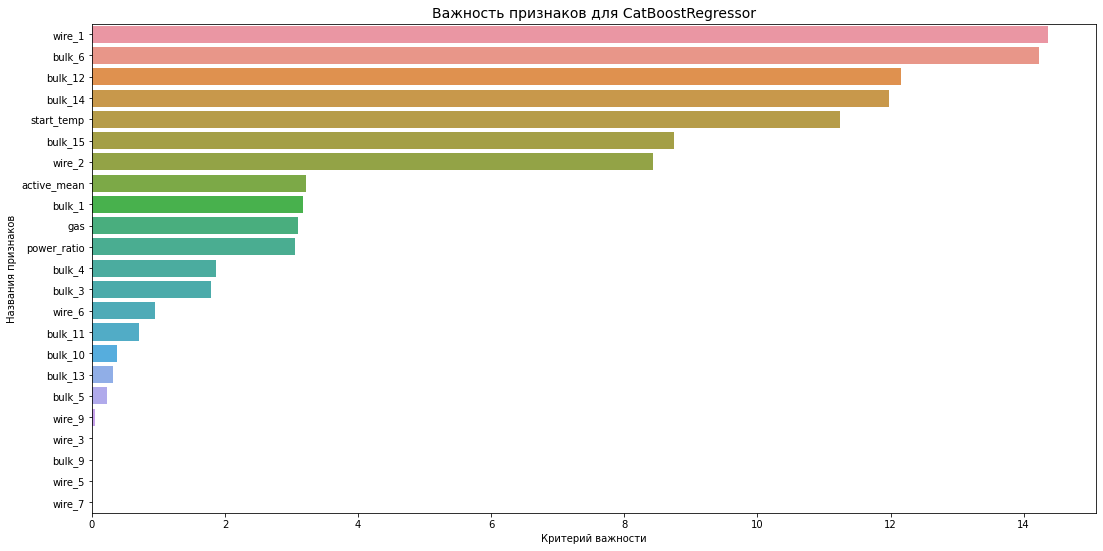

In [92]:
plot_data = {
    'features': X_test.columns,
    'feature_importances': model.feature_importances_,
}
plot_data = pd.DataFrame(plot_data)
plot_data.sort_values(by='feature_importances', ascending=False, inplace=True)
plt.figure(figsize=(18, 9))
sns.barplot(x=plot_data['feature_importances'], y=plot_data['features'])
plt.title('Важность признаков для CatBoostRegressor', fontsize=14)
plt.xlabel('Критерий важности')
plt.ylabel('Названия признаков')
plt.show()

CatBoostRegressor score: 6.553


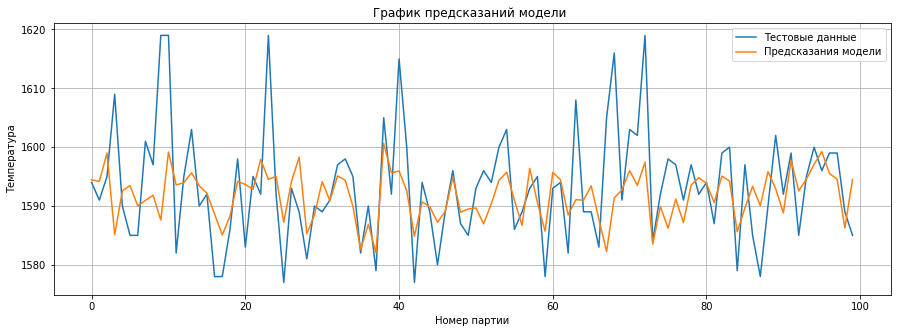

In [93]:
plt.figure(figsize=(15,5))
plt.plot(y_test.reset_index(drop=True)[:100], label='Тестовые данные')
plt.plot(pd.Series(predictions)[:100], label='Предсказания модели')
plt.title('График предсказаний модели ')
plt.xlabel('Номер партии')
plt.ylabel('Температура')
plt.legend()
plt.grid(True)
    
print('{} score: {:.3f}'.format('CatBoostRegressor', mean_absolute_error(y_test, predictions)))

Было проведено тестирование модели CatBoostRegressor со следующими гиперпарамтреами:        
'learning_rate': 0.1, 'loss_function': 'MAE', 'max_depth': 4, 'n_estimators': 250, 'random_state': 180324, 'verbose': False  
На тестовой выборке модель достигает показателя MAE = 6.55, что удовлетворяет минимальным требованиям.  
Были выявлены параметры, сильно влияющие на прогнозы модели (перечисление в порядке убывания):  
start_temp, bulk_14, bulk_12, wire_1, bulk_6, bulk_15, wire_2, wire_1, gas, power_ratio, active_mean    
Также было визуализировано соотношение предсказаний модели с целевым признаком тестовой выборки.  
По графику видно, что модель плохо предсказывает пиковые значения, тем не менее общие черты динамики температуры она отображает.  


### Общий вывод и рекомендации заказчику

В ходе исследования были предприняты следующие действия:    
1 Загрузка данных     
Семь таблиц с инфорацией о производстве стали содержат корректные данные, соответствующие описанию файлов.  
Таблицы содержат показатели, описывающее производство  3239 партий стали.  
Были произведены изменения в названиях столбцов и унификация их написания для удобной работы с данными:   
приведение к нижнему регистру и перевод на английский  
2 Обзор таблицы с данными    
На данном этапе был проведён обзор данных и совершены следующией действия:        
    1) Пропуски в численных параметрах были заполнены нулями      
    2) Были заменены типы данных из object на соответствующие фактическим: float и datetime64   
    3) Были замечены аномалии и выбросы, обработанные на будущих этапах
    
3 Предобработка данных  
На данном этапе были произведены следующие действия:  
    1) Из данных были исключены записи, содержащие меньше двух замеров температуры нагрева    
    2) Убедились в корретности регистрации нагревания по времени - последний замер всегда идёт после первого замера.  
    3) Сопоставили время контрольного замера температуры со временем начала и конца нагрева  
    4) Собрали список ключей партий, прошедших по критериям отбора.  
    5) Из первоначальных 3216 партий к дальнейшему рассмотрению прошли 2473 партий. Количество партий сократилось на 23%  
4 Объединение данных   
Было произведено объединение таблиц, содержащих данные об электродах, объемах подачи сыпучих веществ, продувке сплава газом, 
проволочных материалах и замерах температуры.  
Данные были отобраны по ключам, которые были выявлены на предыдущем этапе работы.  
Был создан дополнительный признак - соотношения активной и реактивной мощностей, также вычислили среднее показателей мощностей.  
Пропуски в данных были заполнены нулями.  
Записи с отсутствующими показателями целевого признака - температуры сплава - в итоговую таблицу не попали.  
Итоговая таблица содержит 2327 записей о партиях стали, что на 28% меньше первоначального количества партий.    
  
5 Статистический анализ объединенных данных   
На данном этапе была рассмотрена матрица корреляции всех параметров, содержащихся в объединённой таблице.  
Были замечены параметры, имещие сильню корреляцию между собой(больше 0.90).  
Для избежания мультиколлинеарности, из таблицы были удалены следующие параметры:    
bulk_7, wire_4, bulk_2, wire_8, bulk_8, reactive_mean    
Также при рассмотрении статистики данных, были замечены значения, 
которые оценены как выбросы и аномалии (ниже 5% данных и выше 90% данных) в следующих столбцах:  
'power_ratio', 'active_mean', 'gas', 'start_temp'.  

6 Подготовка данных к обучению моделей прогнозирования   
На данном этапе данные были разделены на тренировочную и тестовую выборки в соотношении 3:1.  
В тренировочно выборке были исключены данные, содержащие аномалии и выбросы вне промежутка от 5% до 99% данных.  
Количество строк в тренировочной выборке сократилось с 1745 до 899.

7 Обучение моделей машинного обучения    
На данном этапе были обучены четыре модели машинного обучения:    
LinearRegression, RandomForestRegressor, CatBoostRegressor, LGBMRegressor.    
Только модель CatBoostRegressor справились с задачей добиться метрики ниже уровня 6,8.  
На тренировочной выборке лучший показатель продемонстрировала модель CatBoostRegressor со следующими гиперпарамтреами:      
'learning_rate': 0.1, 'loss_function': 'MAE', 'max_depth': 4, 'n_estimators': 250, 'random_state': 180324, 'verbose': False     
Эта модель показала минимальный из четырёх показатель MAE = 6,78.  
Также сопоставляя с MAE константной модели (8.05) видимо, что выявленная лучшая модель справляется с предсказаниями лучше.  

8 Тестирование лучшей модели  
Было проведено тестирование модели CatBoostRegressor со следующими гиперпарамтреами:        
'learning_rate': 0.1, 'loss_function': 'MAE', 'max_depth': 4, 'n_estimators': 250, 'random_state': 180324, 'verbose': False  
На тестовой выборке модель достигает показателя MAE = 6.55, что удовлетворяет минимальным требованиям.  
Были выявлены параметры, сильно влияющие на прогнозы модели (перечисление в порядке убывания):  
start_temp, bulk_14, bulk_12, wire_1, bulk_6, bulk_15, wire_2, wire_1, gas, power_ratio, active_mean    
Также было визуализировано соотношение предсказаний модели с целевым признаком тестовой выборки.  
По графику видно, что модель плохо предсказывает пиковые значения, тем не менее общие черты динамики температуры она отображает.    

9. Общий вывод  
Данные, предоставленный для обучения модели, имели много пропусков, выбросов и аномалий.    
Тем не менее, нам удалось на основе скромной выборки в 2327 записей, обучить модель, которая способна предсказывать температуру сплава.  
Есть возможности к улучшению работы модели: создание дополнительных признаков из уже существующих, обучение на новых корректно собранных данных.  
    
